<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/CaseStudy_School_Budgeting_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Case Study: School Budgeting with Machine Learning in Python</h1> 
</strong>

---

$\color{red}{\textbf{NOTE}}$ After the version scikit-learn **SimpleImputer/Imputer** has been changed its location from `sklearn.preprocessing` to package `sklearn.impute`.

we're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. *Function: Career & Academic Counseling, or Position_Type: Librarian*.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

**Que** - What type of machine learning problem is this?

>$\Rightarrow$ $\color{red}{\textbf{Answer}}$ - __Supervised Learning, because the model will be trained using labeled examples.__

**What is the goal of the algorithm?**

There are different types of supervised machine learning problems. Our goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

>$\Rightarrow$ $\color{red}{\textbf{Classification}}$, **because predicted probabilities will be used to select a label class**.Specifically, we have ourselves a multi-class-multi-label classification problem (quite a mouthful!), because there are 9 broad categories that each take on many possible sub-label instances.


In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (411/411), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 2597 (delta 152), reused 262 (delta 46), pack-reused 2186
Receiving objects: 100% (2597/2597), 329.12 MiB | 40.32 MiB/s, done.
Resolving deltas: 100% (930/930), done.
Checking out files: 100% (1074/1074), done.


In [2]:
!unzip -uq '/content/CAREER-TRACK-Data-Scientist-with-Python/29_Case-Study-School-Budgeting-with-Machine-Learning-in-Python/_dataSet/School Budgeting.zip' -d '/content/CAREER-TRACK-Data-Scientist-with-Python/29_Case-Study-School-Budgeting-with-Machine-Learning-in-Python/_dataSet'

In [3]:
import os
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/29_Case-Study-School-Budgeting-with-Machine-Learning-in-Python/_dataSet')
cwd = os.getcwd()
print(cwd)

/content/CAREER-TRACK-Data-Scientist-with-Python/29_Case-Study-School-Budgeting-with-Machine-Learning-in-Python/_dataSet


In [4]:
ls

 HoldoutData.csv  'School Budgeting.zip'   TestData.csv
 sample_data.csv   SubmissionFormat.csv    TrainingData.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#plt.style.use('ggplot')
sns.set_theme()
%matplotlib inline

# **Chapter - 1**

## **Introducing the challenge**
- Budgets for schools are huge, complex, and not standardize.
    - Hundreds of hours each year are spent manually labelling
- Goal: Build a machine learning algorithm that can automate the process
- Supervised Learning problem


### Loading the data
Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

Some of the column names correspond to **features** - descriptions of the budget items - such as the ```Job_Title_Description``` column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item **labels** you will be trying to predict with your model. For example, the ```Object_Type``` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

In [6]:
df =  pd.read_csv('TrainingData.csv', index_col=0)
print(df.shape)
df.head(10)

(400277, 25)


,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION
229958,Facilities & Maintenance,O&M,School Reported,School,Unspecified,Custodian,Benefits,NO_LABEL,PreK-12 Operating,CONTRA BENEFITS,NaN,GENERAL FUND,Custodian - PT - Jobs,NaN,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,UNDESIGNATED,-8.150,EMPLOYEE BENEFITS,NaN,EMPLOYEE BENEFITS
417668,Instructional Materials & Supplies,Instruction,School Reported,School,Special Education,Non-Position,Supplies/Materials,NO_LABEL,PreK-12 Operating,EDUCATIONAL,SPECIAL EDUCATION INSTRUCTION,LOCAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPPLIES AND MATERIALS,2000.050,SPECIAL EDUCATION LOCAL,LOCAL FUND,NaN
126378,Food Services,O&M,School on Central Budgets,Non-School,Unspecified,Coordinator/Manager,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,NaN,GENERAL FUND,"Sub Manager, Food Service",NaN,NaN,NaN,DISTRICT WIDE ORGANIZATION UNI,NaN,NON-PROJECT,NaN,UNDESIGNATED,0.720,UNDESIGNATED,NaN,UNDESIGNATED
275539,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,NaN,GENERAL FUND,"Teacher, Elementary",Regular,NaN,NaN,NaN,NaN,ELA S - TEACHING SPANISH ONLY,NaN,PROFESSIONAL-INSTRUCTIONAL,228.250,GENERAL ELEMENTARY EDUCATION,NaN,REGULAR INSTRUCTION
85262,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher,Retrd Shrt Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,69.560,GENERAL ELEMENTARY EDUCATION,NaN,REGULAR INSTRUCTION


In [7]:
df.columns

Index(['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Function                400277 non-null  object 
 1   Use                     400277 non-null  object 
 2   Sharing                 400277 non-null  object 
 3   Reporting               400277 non-null  object 
 4   Student_Type            400277 non-null  object 
 5   Position_Type           400277 non-null  object 
 6   Object_Type             400277 non-null  object 
 7   Pre_K                   400277 non-null  object 
 8   Operating_Status        400277 non-null  object 
 9   Object_Description      375493 non-null  object 
 10  Text_2                  88217 non-null   object 
 11  SubFund_Description     306855 non-null  object 
 12  Job_Title_Description   292743 non-null  object 
 13  Text_3                  109152 non-null  object 
 14  Text_4         

In [9]:
df.isna().sum()

Function                       0
Use                            0
Sharing                        0
Reporting                      0
Student_Type                   0
Position_Type                  0
Object_Type                    0
Pre_K                          0
Operating_Status               0
Object_Description         24784
Text_2                    312060
SubFund_Description        93422
Job_Title_Description     107534
Text_3                    291125
Text_4                    346531
Sub_Object_Description    308674
Location_Description      238223
FTE                       274206
Function_Description       58082
Facility_or_Department    346391
Position_Extra            135513
Total                       4555
Program_Description        95617
Fund_Description          197400
Text_1                    107992
dtype: int64

In [10]:
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


>Make sure to call `df.dtypes.value_counts()`, and not `df.value_counts()`! Check out the difference in the Shell. `df.value_counts()` will return an __error__, __because it is a Series method__, not a __DataFrame method__.

In [11]:
df.value_counts()

Series([], dtype: int64)

### Summarizing the data
You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset.

You can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called FTE and Total.

- FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
- Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

In [12]:
# Print the summary statistics
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


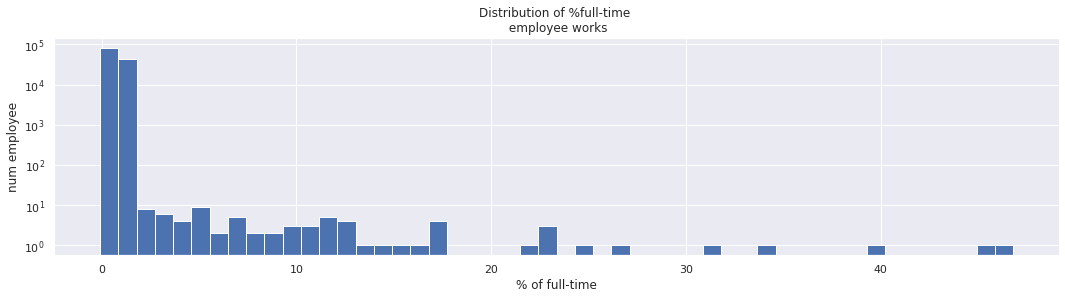

In [13]:
sns.set_theme()

# Create the histogram
plt.figure(figsize=(18, 4))
plt.hist(df['FTE'].dropna(), bins=50)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employee')
plt.yscale('log')
plt.show()

In [14]:
df['FTE'].dropna().describe()

count    126071.000000
mean          0.426794
std           0.573576
min          -0.087551
25%           0.000792
50%           0.130927
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

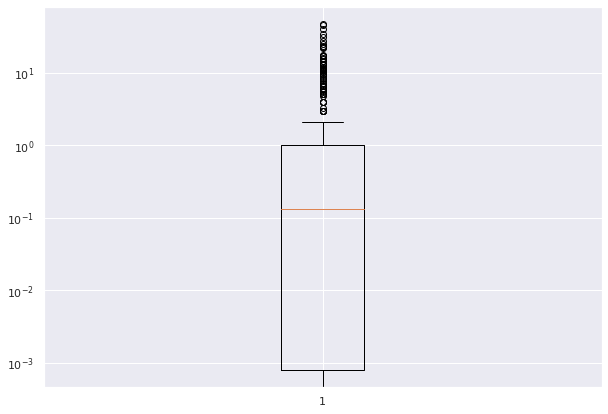

In [15]:
sns.set_theme()

# Create the histogram
plt.figure(figsize=(10, 7))
plt.boxplot(df['FTE'].dropna())
plt.yscale('log')

## **Looking at the datatypes**

- **Machine Learning algorithms work on numbers, not strings**
    - Need a numeric representation of these strings
- Strings can be slow as compared to numbers
- In pandas, `category` dtype encodes categorical data numerically,
    - Can speed up code
    

### Exploring datatypes in pandas

***It's always good to know what datatypes you're working with***, especially when the inefficient pandas type $\color{red}{\textbf{object}}$ may be involved. 

**How many columns with dtype object are in the data?**

In [16]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

### Encode the labels as categorical variables

Remember, Our ultimate goal is **to predict the probability that a certain label** is attached to a budget line item. We just saw that many columns in your data are the **inefficient object type**. Does this include the labels you're trying to predict? Let's find out!

> There are **9 columns** of labels in the dataset. Each of these columns is a category that has many possible values it can take. 

We have notice that every __label__ is encoded as an object datatype. Because category datatypes are much more efficient Our task is to convert the labels to category types using the `.astype()` method.

#### **LABELS**

In [17]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
          'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

```python
def cat_label(x):
    return x.astype('category')

df[LABELS] = cat_label(df[LABELS])

# Print the converted dtypes
print(df[LABELS].dtypes)
```

In [18]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a category type
df[LABELS] = categorize_label(df[LABELS])

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


### Counting unique labels

There are over 100 unique labels. In this exercise, we will explore this fact by counting and plotting the number of unique values for each category of label.

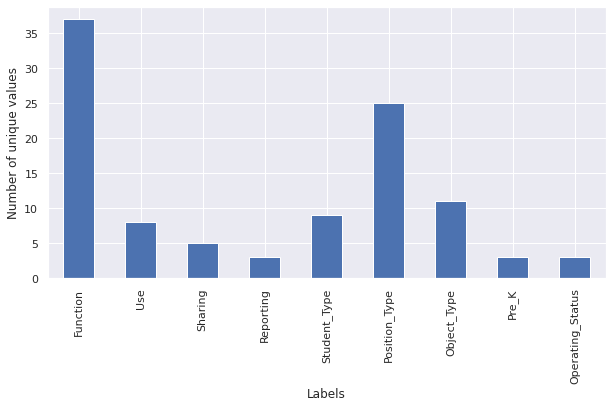

In [19]:
# Calculate number of unique values for each labels: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

sns.set_theme()

# Plot number of unique values for each label
plt.figure(figsize=(10, 5))
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values');

## How do we measure success?

**Accuracy can be misleading when classes are imbalanced**
- Legitmate email: 99%, Spam: 1%
- Model that never predicts spam will be 99% accurate!

**Metric used in this problem: log loss**
- Loss function
- Measure of error
- Want to minimize the error (unlike accuracy)

**Log loss binary classification**

$$ log\space loss = -\frac{1}{N} \sum^{N}_{i=1}(y_i \log(p_i)) + (1- y_i)\log(1-p_i)) $$

- **Actual value** $\rightarrow$ $y: {1=\text{yes}, 0=\text{no}}$
- **Prediction** (probability that the value is 1)$\rightarrow$ $p$

---

__Example:__

__Case - 1__

- Consider __True lable__ $y=0$
-  Model confidently Predict $1$(with ${p=0.90}$)

$$ log\space loss_{(N=1)} = -\frac{1}{N} \sum^{N}_{i=1}(y_i \log(p_i)) + (1- y_i)\log(1-p_i)) $$



$ log\space loss = (1-y)log(1-p)$

$log\space loss = log(1-0.9)$

$log\space loss = log(0.1)$

$log\space loss = 2.30$

__Case - 2__

- Consider __True lable__ $y=1$
-  Model confidently Predict $1$(with ${p=0.50}$)

$$ log\space loss_{(N=1)} = -\frac{1}{N} \sum^{N}_{i=1}(y_i \log(p_i)) + (1- y_i)\log(1-p_i)) $$

$log\space loss = 0.60$

>*Since We are trying to minimize log loss, we can see that it is better to be less confident than it is to be confident and wrong.*
---
    

### **Penalizing highly confident wrong answers**

**Suppose you have the following 3 examples:**

- $A:y=1,p=0.85$
- $B:y=0,p=0.99$
- $C:y=0,p=0.51$

Select the ordering of the examples which corresponds to the **lowest to highest** $log\space loss$ scores. $y$ is an indicator of whether the example was classified correctly.

- Ans: __Lowest: A, Middle: C, Highest: B__

>**B** will have a ***higher log loss*** because it is ***confident and wrong***.

**Computing log loss with NumPy**

To see how the **log loss metric** handles the **trade-off** between **accuracy** and **confidence**, we will use some sample data generated with NumPy and compute the log loss using the provided function `compute_log_loss()`

In [20]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """Compute the logarithmic loss between predicted and
       actual when these are 1D arrays

       :param predicted: The predicted probabilties as floats between 0-1
       :param actual: The actual binary labels. Either 0 or 1
       :param eps (optional): log(0) is inf, so we need to offset our
                               predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1-eps) # clip function which sets a max & min value for the elements in an array.
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    return loss

correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


**Log loss penalizes highly confident wrong answers much more than any other type**. This will be a good metric to use on your models.

# **Chapter - 2**

## Time to build model
- Always a good approach to **start** with a very **simple model**
- it will Gives us the sense of how challengeing the problem is
- Many more things can go wrong in **complex models**
- How much signal can we pull out using basic methods?
- Train basic model on numeric data only
    - Want to go from raw data to predictions quickly
- **Multiclass logistic regression**
    - Train classifier on each label separately and use those to predict
- Format predictions and save to csv
- Compute **log loss score**
- Splitting the multi-class dataset
    - Recall: **Train-test split**
        - Will not work here
        - May end up with labels in test set that never appear in training set
    -  Solution: `StratifiedShuffleSplit`
        - **Only works with a single target variable**

### Setting up a train-test split in scikit-learn

If we split our dataset **randomly**, we may end up with labels in our **test set** that never appeared in our **training set**. Our model ***won't be able to predict a class*** that it has never seen before! One approach to this problem is called `StratifiedShuffleSplit`, which is mentioned in the **supervised learning** Jupyter notebook.

However, this **scikit-learn** function only works if you have a **single target variable**. In our case, we have **many target variables**. To work around this issue, we've provided a utility function, `multilabel_train_test_split`, that will ensure that all of the classes are represented in both the `test` and `training sets`. We'll have a link to that code in the exercises if you're curious. 




In [21]:
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

- we'll start with a simple model that uses just the numeric columns of your DataFrame when calling `multilabel_train_test_split`. 

- **NUMERIC_COLUMNS** is a variable we provide that contains a list of the column names for the columns that are numbers rather than text. 

- Then we'll do a minimal amount of **preprocessing** where we fill the `NaN` that are in the dataset with `-1000`. In this case, we choose -1000, because **we want our algorithm to respond to `NaN`'s differently than 0**. 

- We'll create our array of target variables using Pandas `get_dummies` function, the get_dummies function takes our **categories**, and produces a **binary indicator** for our **targets**, which is the format that scikit-learn needs to build a model.

- Finally, we use the `multilabel_train_test_split` function that is provided to split the dataset into a **training set** and a **test set**.

In [22]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [23]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000).copy()

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only, label_dummies,
                                                               size=0.2, seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")
print(X_test.info())
print("\ny_train info:")
print(y_train.info())
print("\ny_test info:")
print(y_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FTE     320222 non-null  float64
 1   Total   320222 non-null  float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FTE     80055 non-null  float64
 1   Total   80055 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Columns: 104 entries, Funct

### Training a model
With split data in hand, you're only a few lines away from training a model.

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the ```NUMERIC_COLUMNS``` of your feature data.

Then you'll test and print the accuracy with the ```.score()``` method to see the results of training.

**Before you train!** Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


- *The good news is that your workflow didn't cause any errors.*

- The bad news is that your **model scored the lowest possible accuracy: 0.0!** But hey, you just threw away ALL of the text data in the budget. Later, you won't. Before you add the text data, let's see how the model does when scored by log loss.

## Making predictions


### Use your model to predict values on holdout data
You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise you'll do just that by using the .predict_proba() method on your trained model.

In [25]:
import os
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/29_Case-Study-School-Budgeting-with-Machine-Learning-in-Python/_dataSet')
cwd = os.getcwd()
cwd

'/content/CAREER-TRACK-Data-Scientist-with-Python/29_Case-Study-School-Budgeting-with-Machine-Learning-in-Python/_dataSet'

In [26]:
ls

 HoldoutData.csv  'School Budgeting.zip'   TestData.csv
 sample_data.csv   SubmissionFormat.csv    TrainingData.csv


In [27]:
# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)
holdout.head(2)

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
237,Personal Services - Teachers,Instruction - Regular,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIME CARD CERTIFIEDAddl,Alternative Schools Instruction,175.350000,NaN,NaN,General Purpose School,NaN
466,Extra Duty/Signing Bonus Pay,Basic Educational Services,NaN,NaN,NaN,General,School,NaN,Instruction,NaN,NaN,43424.905849,NaN,NaN,General Fund,NaN


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

### Writing out your results to a csv for submission
At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a .csv using the ```.to_csv()``` method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!

You'll need to make sure your submission obeys the correct format.

To do this, you'll use your predictions values to create a new DataFrame, ```prediction_df```.

**Interpreting LogLoss & Beating the Benchmark**:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

In [29]:
BOX_PLOTS_COLUMN_INDICES = [range(0, 37),
 range(37, 48),
 range(48, 51),
 range(51, 76),
 range(76, 79),
 range(79, 82),
 range(82, 87),
 range(87, 96),
 range(96, 104)]

In [30]:
def _multi_multi_log_loss(predicted,
                          actual,
                          class_column_indices=BOX_PLOTS_COLUMN_INDICES,
                          eps=1e-15):
    """ Multi class version of Logarithmic Loss metric as implemented on
    DrivenData.org
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)
    
    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices].astype(np.float64)
        
        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions so
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs
        
    return np.average(class_scores)

In [31]:
def score_submission(pred_path='./', holdout_path='https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'):
    # this happens on the backend to get the score
    holdout_labels = pd.get_dummies(
        pd.read_csv(holdout_path, index_col=0)
        .apply(lambda x: x.astype('category'), axis=0)
    )
    
    preds = pd.read_csv(pred_path, index_col=0)
    
    # make sure that format is correct
    assert (preds.columns == holdout_labels.columns).all()
    assert (preds.index == holdout_labels.index).all()
    
    return _multi_multi_log_loss(preds.values, holdout_labels.values)

In [32]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)

# Save prediction_df to csv
prediction_df.to_csv('/content/predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='/content/predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

Your model, trained with numeric data only, yields logloss score: 1.9587991952975363


Even though your basic model scored $0.0$ accuracy, it nevertheless performs better than the benchmark score of $2.0455$. You've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up your game and incorporate the text data.

## __NLP__

---

- A very brief introduction to NLP
    - **Data for NLP**:
        - Text, documents, speech,...
    - **Tokenization**
        - Spliting a string into segments
        - Store segments as list
    - Example: "Natural Langauge Processing" -> ["Natural", "Language", "Processing"]
- **Bag of words representation**
    - Count the number of times a particular token appears
    - "Bag of words"
        - Count the number of times a word was pulled out of the bag
    - This approach discards information about word order
        - "Red, not blue" is the same as "blue, not red"


## Representing text numerically

- Representing text numerically
    - **Bag-of-words**
        - Simple way to represent text in machine learning
        - Discards information about grammar and word order
        - Computes frequency of occurance

### **Testing your NLP credentials with n-grams**

In the workspace, we have the loaded a python list, one_grams, which contains all `1-grams` of the string `petro-vend fuel` and fluids, tokenized on punctuation. Specifically,

`one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']`

In this exercise, your job is to determine the sum of the sizes of `1-grams`, `2-grams` and `3-grams` generated by the string `petro-vend fuel and fluids`, tokenized on punctuation.

_Recall that the n-gram of a sequence consists of all ordered subsequences of length n._

>The number of `1-grams` + `2-grams` + `3-grams` is $5 + 4 + 3 = 12$

### Creating a bag-of-words in scikit-learn

`CountVectorizer()`

- **Tokenizes all the strings**
- **Builds a "vocabulary"**
- **Counts the occurrences of each token in the vocabulary**

In this exercise, we'll study **the effects of tokenizing** in different ways by comparing the **bag-of-words** representations resulting from different token patterns.

>we will focus on one feature only, the `Position_Extra` column, which describes any additional information not captured by the `Position_Type` label.

For example, in the Shell you can check out the budget item in row 8960 of the data using `df.loc[8960]`. Looking at the output reveals that this `Object_Description` is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of ```vec_basic```, which splits ```df.Position_Extra``` into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.

- [**Regular Expression**](https://www.w3schools.com/python/python_regex.asp) is a sequence of characters that forms a search pattern.

- RegEx can be used to check if a string contains the specified search pattern.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
# we will define a regular expression that does a split on whitespace
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'  

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer:vec_alphanumeric
# Convert a collection of text documents to a matrix of token counts
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin']


Treating only alpha-numeric characters as tokens gives you a smaller number of more meaningful tokens. we've got bag-of-words in the bag!

### **Combining text columns for tokenization**

In order to get a bag-of-words representation for all of the text data in our DataFrame, we must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because we only looked at one column of data, so each row was already just a single string. `CountVectorizer` ***expects each row to just be a single string***, so in order to use all of the text columns, **we need a method to turn a list of strings into a single string**.

In this exercise, we'll complete the function definition `combine_text_columns()`. 
>This function will **convert all training text data in your DataFrame to a single string per row** that can be passed to the vectorizer object and made into a **bag-of-words** using the `.fit_transform()` method.

#### __`combine_text_columns`__

In [34]:
# Define combine_text_columns()

def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis='columns')
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

### What's in a token?
Now you will use ```combine_text_columns``` to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the ```.fit_transform()``` method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.



In [35]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVecotrizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


Notice that tokenizing on alpha-numeric tokens reduced the number of tokens, just as in the last exercise. We'll keep this in mind when building a better model with the Pipeline object next.

# **Chapter - 3**

## Pipelines, feature & text preprocessing


The supervised learning course introduced **pipelines**, which are a **repeatable way to go from raw data to a trained machine learning model**. The scikit-learn **Pipeline** object takes a **sequential list** of steps where the ***output of one step is the input to the next***. Each step is represented with a **name** for the step, that is simply a **string**, and an object that implements the **`fit`** and the **`transform`** methods. A good example is the **`CountVectorizer`**.

Pipelines are a very **flexible** way to represent your workflow. In fact, we can even have a **sub-pipeline** as one of the steps! 

>**The beauty of the Pipeline is that it encapsulates every transformation from raw data to a trained model.**

- ***The pipeline workflow***
    - Repeatable way to go from **raw data** to **trained model**
    - Pipeline object **takes sequential list** of steps
        - Output of one step is input to next step
    - Each step is a tuple with two elements
        - Name: String
        - Transform: obj implementing **`.fit()`** and **`.transform()`**
    - **Flexible**: a step can itself be another pipeline!

### Pipeline workflow (IRIS dataset)

**Example:** *Build 3 pipelines, each with a different estimator (classification algorithm), using default hyperparameters:* 

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib     # Save pipeline to file
from sklearn import linear_model         # from sklearn import linear_model
from sklearn import svm
from sklearn import tree                 # from sklearn.tree import DecisionTreeClassifier

SEED = 42

# Load and split the data
iris = load_iris() # Data from the sklearn dataset
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=SEED)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', linear_model.LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', svm.SVC(random_state=42))])
			
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]
			
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression',
             1: 'Support Vector Machine',
             2: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''

for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx

print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.900
Support Vector Machine pipeline test accuracy: 0.900
Decision Tree pipeline test accuracy: 0.867
Classifier with best accuracy: Logistic Regression
Saved Logistic Regression pipeline to file


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


###__Building the pipeline for sample dataset__
- Preprocess

In [37]:
sample_df = pd.read_csv('sample_data.csv')
sample_df.head(3)

,Unnamed: 0,numeric,text,with_missing,label
0,0,-10.856306,NaN,4.433240,b
1,1,9.973454,foo,4.310229,b
2,2,2.829785,foo bar,2.469828,a


**One-vs-the-rest** (OvR) **multiclass/multilabel strategy**

- Also known as one-vs-all, **this strategy consists in fitting one classifier per class**. 

- For each classifier, the class is fitted against all the other classes. In addition to its **computational efficiency** (only `n_classes classifiers` are needed), one advantage of this approach is its **interpretability**. 

- Since **each class is represented by one and one classifier only**, it is possible to **gain knowledge about the class** by inspecting its corresponding classifier.

- This is the most commonly used strategy for **multiclass classification** and is a fair default choice.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

SEED=22

# Split and select numeric data only, no nans
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']], 
                                                    pd.get_dummies(sample_df['label']),
                                                    random_state=SEED)

# Instantiate Pipeline object: pl
pl = Pipeline([
               ('clf', OneVsRestClassifier(LogisticRegression()))
])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


### Preprocessing numeric features

$\Rightarrow$ **What would have happened if you had included the with `with_missing` column in the last exercise?** 

**Without imputing** missing values, the **pipeline** would not be happy (try it and see). So, in this exercise you'll improve our pipeline a **bit** by using the `Imputer()` **imputation transformer **from scikit-learn to **fill** in **missing values** in our sample data.

**By default**, the [imputer transformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) replaces NaNs with the **mean** value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, we will edit the steps list used in the previous exercise by inserting a `(name, transform)` tuple. Recall that steps are processed **sequentially**, so make sure the new **tuple** encoding our preprocessing step is put in the right place.

In [39]:
from sklearn.impute import SimpleImputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                   pd.get_dummies(sample_df['label']),
                                                   random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
    ('imp', SimpleImputer()),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


Now we know how to use **preprocessing** in **pipelines** with **numeric data**, and it looks like the **accuracy has improved** 

## Text features and feature unions

- **Preprocessing multiple dtypes**
    - Want to use **all available features in one pipeline**
    - Problem
        - Pipeline steps for numeric and text processing can't follow each other.
        - E.g., output of **`CountVectorizer`** can't be input to **`Imputer`**
    - **Solution**
        - **`FunctionTransformer()`**
        - **`FeatureUnion()`**
        
        __FunctionTransformer__ and __FeatureUnion__ help us build a Pipeline to work with both our **text** and **numeric data**.
        

- **`FunctionTransformer()`**
    - ***Turns a Python function into an object that a scikit-learn pipeline can understand***
    - Need to write two functions for pipeline preprocessing
        - Take entire DataFrame, return numeric columns
        - Take entire DataFrame, return text columns
    - Can then preprocess numeric and text data in separate pipelines

### Preprocessing text features

>Here, we'll perform a **similar preprocessing pipeline step**, only this time we'll use the **`text`** column from the sample data.

To **preprocess** the text, we'll turn to **`CountVectorizer()`** to generate a ***bag-of-words representation of the data***. Using the [default](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) arguments, add a `(step, transform)` tuple to the steps list in our pipeline.

Make sure to select only the text column for splitting training and test sets.

In [40]:
sample_df['text'] = sample_df['text'].fillna("")

In [41]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


### Multiple types of processing: **FunctionTransformer**

Any step in the **pipeline** must be an object that implements the **`fit`** and **`transform`** methods. The [**FunctionTransformer**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

>We are working with **numeric data** that needs **imputation**, and **text data** that needs to be converted into a **bag-of-words**. we'll create functions that **separate** the **text** from the **numeric variables** and see how the **`.fit()`** and **`.transform()`** methods work.

**`validate=False`** -  This simply tells **scikit-learn** it doesn't need to check for `NaNs` or `validate` the dtypes of the input. We'll do that work ourselves.

In [42]:
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numberic data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


### Multiple types of processing: **FeatureUnion**

Now that we can **separate text** and **numeric data** in our pipeline, we're ready to perform separate steps on each by nesting pipelines and using `FeatureUnion()`.

These tools will allow you to **streamline all preprocessing steps for our model, even when multiple datatypes are involved**.

- Here, for example, we **don't** want to **impute our text data**, and we ***don't*** want to create a **bag-of-words with our numeric data**.
- Instead, we want to deal with these **separately** and then **join the results together** using `FeatureUnion()`.

In the end, we'll still have only **two high-level** steps in our pipeline:
- **Preprocessing** and 
- **Model instantiation**. 

The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using `FeatureUnion()`.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion


X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                   pd.get_dummies(sample_df['label']),
                                                   random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
    transformer_list=[
        ('numeric_features', Pipeline([
            ('selector', get_numeric_data),
            ('imputer', SimpleImputer())
        ])),
        ('text_features', Pipeline([
            ('selector', get_text_data),
            ('vectorizer', CountVectorizer())
        ]))
    ]
)

# Instantiate nested pipeline: pl
pl = Pipeline([
    ('union', process_and_join_features),
    ('clf', OneVsRestClassifier(LogisticRegression()))
])

# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


## Choosing a classification model


### Using FunctionTransformer on the main dataset

In this exercise you're going to use ```FunctionTransformer``` on the **primary budget data**, before instantiating a **multiple-datatype pipeline** in the next exercise.

Recall from Chapter 2 that we used a custom function **`combine_text_columns`** to **select** and **properly format** text data for **tokenization**; it is loaded into the workspace and ready to be put to work in a function transformer!

In [44]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               size=0.2,
                                                               seed=123
                                                               )

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

### Add a model to the pipeline
You're about to take everything you've learned so far and implement it in a Pipeline that works with the real, [DrivenData](https://www.drivendata.org/) budget line item data you've been exploring.

Surprise! The structure of the pipeline is exactly the same as earlier in this chapter:

- the preprocessing step uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes
- the model step stores the model object

In [45]:
# Complete the pipeline: pl
pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', SimpleImputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000), n_jobs=-1))
])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.0


Now that we've built the **entire pipeline**, we can easily start trying out different models by just modifying the `clf` step.

### Try a different class of model
Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step ```('clf', OneVsRestClassifier(LogisticRegression()))``` in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a [random forest](https://en.wikipedia.org/wiki/Random_forest) classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', SimpleImputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', RandomForestClassifier(n_jobs=-1))
])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

### Can you adjust the model or parameters to improve accuracy?
You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('imputer', SimpleImputer())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('vectorizer', CountVectorizer())
            ]))
        ]
    )),
    ('clf', RandomForestClassifier(n_estimators=15, n_jobs=-1))
])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

# **Chapter - 4**

## Learning from the expert: processing
- Text preprocessing
    - ***NLP tricks for text data***
        - Tokenize on **punctuation** to avoid **hyphens**, **underscores**, etc.
        - Includes **Unigrams** and **Bi-grams** in the model ***to capture important information *** involving multiple tokens - e.g. "middle school"

**How many tokens?**

Going forward, we'll use alpha-numeric sequences, and only alpha-numeric sequences, as **tokens**. Alpha-numeric tokens contain only letters `a-z` and numbers `0-9` (no other characters). In other words, we'll **tokenize** on punctuation to generate `n-gram` statistics.

Assuming we tokenize on punctuation, accepting only alpha-numeric sequences as tokens, how many tokens are in the following string from the main dataset?

```
'PLANNING,RES,DEV,& EVAL'
```
- **`4` because `,` and `&` are not tokens**

### Deciding what's a word
Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, you will use ```CountVectorizer``` on the training data ```X_train``` to see the effect of tokenization on punctuation.

Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function, combine_text_columns before fitting to the training data.

In [ ]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

### **N-gram range in scikit-learn**

In this exercise we'll insert a `CountVectorizer` instance into your pipeline for the main dataset, and compute multiple **n-gram** features to be used in the model.

In order to look for **n-gram** relationships at multiple scales, you will use the `ngram_range` parameter.

**Special functions**: we'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the `dim_red` step following the `vectorizer` step , and the `scale` step preceeding the `clf` (classification) step.

These have been added in order to account for the fact that you're using a **reduced-size sample** of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a __dimensionality reduction__ technique, which is what the __`dim_red`__ step does, and we have to __scale the features__ to lie between `-1` and `1`, which is what the scale step does.

The `dim_red` step uses a scikit-learn function called `SelectKBest()`, applying something called the __chi-squared test__ to select the K "best" features. The `scale` step uses a scikit-learn function called `MaxAbsScaler()` in order to squash the relevant features into the interval -1 to 1.

You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!

In [ ]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
    ])

In [ ]:
# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

## Learning from the expert: a **stats trick**
- Interaction terms
    - Example
        - **English teacher** for **2nd grade**
        - **2nd grade** budget for **English teacher**
    - Interaction terms mathematically describe when tokens appear together
    - the math:

$ \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 \times x_2) $
- $x_3$ = $x_1$*$x_2$ = 0 x 1 = 0
- $x_3$ = $x_1$*$x_2$ = 1 x 1 = 1

we only get a $1$ if both occur. This new column, $X_3$, has its own coefficient, $\beta_3$ which can separately measure how important it is that $X_1$ and $X_2$ appear together. Again,

__Adding interaction features with scikit-learn__

Scikit-learn provides us with a straightforward way of adding interaction terms. In scikit-learn this functionality is called PolynomialFeatures.

```python
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2, interaction_only=True include_bias=False)
interaction.fit_transform(x)
```
- The `interaction_only=True` parameter tells PolynomialFeatures that we don't need to multiply a column by itself

- When we __fit__ and __transform__ our array, $x$, we can see that we get the expected output from the last slide with the new column added. We opted not to include a bias term in our model, but you could have if you wanted to. __A bias term is an offset for a model.__




### **Which models of the data include interaction terms?**

Recall from the video that interaction terms involve products of features.

Suppose we have two features x and y, and we use models that process the features as follows:

1. βx + βy + ββ
2. βxy + βx + βy
3. βx + βy + βx^2 + βy^2

where β is a coefficient in your model (not a feature).

Which expression(s) include interaction terms?

- $2^{nd}$ as $xy$ term is present, which represents interactions between features.

### Implement interaction modeling in scikit-learn

It's time to add interaction features to Our model. 

- The __`PolynomialFeatures`__ object in scikit-learn does just that, but here we're going to use a **custom interaction** object.

- __`SparseInteractions`__ Interaction terms are a statistical tool that lets Our model express what happens if two features appear together in the same row.

- __`SparseInteractions`__ does the same thing as `PolynomialFeatures`, but it uses **sparse matrices**(**sparse matrix or sparse array is a matrix in which most of the elements are zero**) to do so. we can get the code for `SparseInteractions` at [this GitHub Gist](https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py)

- **`PolynomialFeatures`** and **`SparseInteractions`** both take the argument `degree`, which tells them what polynomial degree of interactions to compute.

- we're going to consider interaction terms of `degree=2` in our pipeline. we will insert these steps after the preprocessing steps we've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since we're making `n` features into `n-squared features`!), so as long as we set it up right, we'll do the heavy lifting and tell you what your score is!

In [ ]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [ ]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
    ])

In [ ]:
# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sparse interaction: ", accuracy)

## Learning from the expert the winning model

- we need to balance adding new features with the computational cost of additional columns.
    - For **example**, adding **3-grams** or **4-grams** is going to have an enormous increase in the size of the array. As the array grows in size, we need more computational power to fit our model.

- The **"hashing trick"** is a way of **limiting the size of the matrix** that we create **without sacrificing too much model accuracy**. A **hash function** takes an **input**, in this case a **token**, and **outputs** a **hash value**.
    - For **example**, the hash value may be an **integer**. We explicitly state how many possible outputs the hashing function may have. 
    - For **example**, we may say that we will only have **250** outputs of the hash function. The **HashingVectorizer** then **maps every token to one of those 250 columns**. 
        - *Some columns will have multiple tokens that map to them. Interestingly, the original paper about the hashing function demonstrates that even if two tokens hash to the same value, there is very little effect on model accuracy in real world problems.*

- **The hashing trick**
    - Adding new features may cause enormous increase in array size.
    - Hashing is a way of increasing memory efficiency
        - Hash function limits possible outputs, fixing array size.
- When to use the hashing trick
    - Want to make array of features as small as possible
        - Dimensionality reduction
        - Particularly useful on large datasets
        - E.g., lots of text data!

[**Feature hashing**](https://en.wikipedia.org/wiki/Feature_hashing#Feature_vectorization_using_the_hashing_trick): In **machine learning**,** feature hashing**, also known as the **hashing trick** (by analogy to the ***kernel trick***), is a ***fast and space-efficient way of vectorizing features***, i.e. **turning arbitrary features** into indices in a vector or matrix. It works by applying a hash function to the features and using their hash values as indices directly, rather than looking the indices up in an associative array. 

### ${Why\space is\space hashing\space a\space useful\space trick?}$

Some problems are **memory-bound** and not easily **parallelizable**, and hashing enforces a **fixed length computation** instead of using a **mutable datatype** (like a dictionary).

> ***By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets***.

### Implementing the hashing trick in scikit-learn


In this exercise we will check out the `scikit-learn` implementation of `HashingVectorizer` before adding it to Our pipeline later.

>`HashingVectorizer` acts just like `CountVectorizer` in that it can accept `token_pattern` and `ngram_range` parameters. **The important difference is that it creates hash values from the text**, so that we get all the computational advantages of hashing!

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

### Build the winning model
You have arrived! This is where all of your hard work pays off. It's time to build the model that won DrivenData's competition.

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

In [ ]:
# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

Looks like the performance is about the same, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. Try this pipeline out on the whole dataset on your local machine to see its full power!

**What tactics got the winner the best score?**

1. The winner used a 500 layer deep convolutional neural network to master the budget data. __[X]__


2. The winner used an ensemble of many models for classification, taking the best results as predictions. __[X]__

3. **The winner used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data**. __[✓]__

>***Often times simpler is better, and understanding the problem in depth leads to simpler solutions!***

**Quickly test ways of improving your submission**

- **NLP**: Stemming, stop-word removal
- **Model**: RandomForest, k-NN, Naïve Bayes
- **Numeric** Preprocessing: Imputation strategies
- **Optimization**: Grid search over pipeline objects
- **Experiment** with new scikit-learn techniques

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>